In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

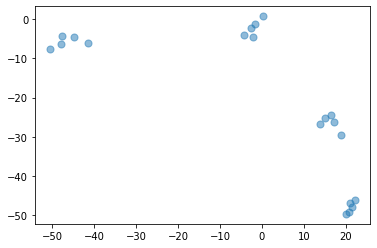

In [4]:
K = 4
x, _ = make_blobs(n_samples=K*5, n_features=2, centers=K, cluster_std=2, center_box=(-50, 30))
plt.scatter(x[:, 0], x[:, 1], s=50, alpha=0.5)

In [295]:
def k_means(x, K, centroids=None, epochs=10):
    N = x.shape[0]
    if centroids is None:
        centroids = x[np.random.choice(N, K, replace=False)]
    clusters = np.zeros(N)
    for _ in range(epochs):
        ex = np.array(centroids.copy())
        # 距離が一番近い中心点を取得
        clusters = np.array([np.argmin(np.sum((centroids - x[n]) ** 2, axis=1)) for n in range(N)])
        # 中心の移動
        centroids = np.array([x[clusters == k].mean(axis=0) for k in range(K)])
        
        if np.all(ex == centroids): break
    return clusters, centroids

In [266]:
centroids = np.array(x[np.random.choice(x.shape[0], K, replace=False)])
centroids

array([[-44.69295979,  -4.48325275],
       [ -2.09365423,  -4.53883414],
       [ 15.02726065, -25.14290524],
       [-50.35046966,  -7.51320546]])

In [312]:
[np.sum((centroids[k] - x[clusters == k]) ** 2).mean() for k in range(K)]

[54.65614973766703, 28.390609789642486, 30.534608915728732, 10.503074051040592]

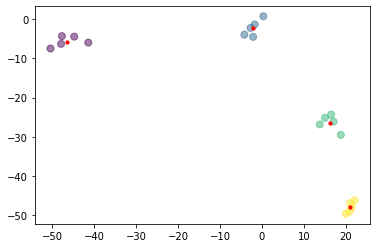

In [307]:
clusters, centroids = k_means(x, K, None, 100)
plt.scatter(x[:, 0], x[:, 1], c=clusters, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=10)

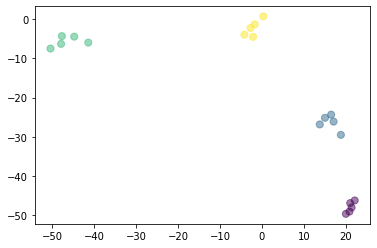

In [294]:
# sklearn版K-MEANS
from sklearn.cluster import KMeans
km = KMeans(n_clusters=K, init='random', n_init=10, max_iter=x.size, tol=1e-4, random_state=0)
centroids = km.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=clusters, s=50, alpha=0.5)

In [185]:
def k_means_pp(x, K, epochs=10):
    N, D = x.shape
    distance = np.zeros(N)
    centroids = np.zeros((K, D))
    # 1つ目の中心点はランダム
    r = np.repeat(1 / N, N)
    for k in np.arange(K):
        centroids[k] = x[np.random.choice(np.arange(N), 1, p=r)]
        distance = np.sum((x - centroid[k]) ** 2, axis=1)
        r = distance / np.sum(distance)
    return k_means(x, K, centroids, epochs)

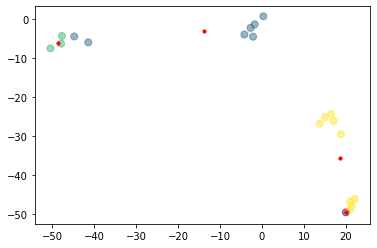

In [207]:
clusters, centroids = k_means_pp(x, K, x.size)
plt.scatter(x[:, 0], x[:, 1], c=clusters, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=10)

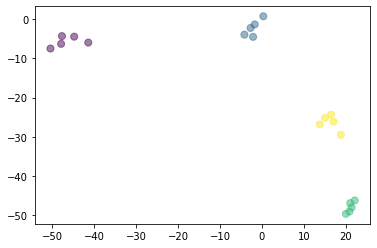

In [218]:
# sklearn版K-MEANS++
from sklearn.cluster import KMeans
km = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=x.size, tol=1e-4, random_state=0)
centroids = km.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=clusters, s=50, alpha=0.5)

In [99]:
def dbscan(pts, eps=1.0, min_pts=3):
    distance = lambda x, y: np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
    visited = set([])
    noise = set([])
    clusters = []
    for i, p in enumerate(pts):
        if i in visited: continue
        visited.add(i)
        seeds = [q for q in pts if distance(p, q) < eps and p != q]
        
    return clusters

In [2]:
#clusters = dbscan(x, 1.0, 3)
#clusters
distance = lambda x, y: np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
seeds = [q for q in x if distance(x[0], q) < 1.0]
seeds
    
#https://m-a-o.hatenablog.com/entries/2010/12/11

NameError: name 'x' is not defined